### Tl;dr ###
Paring down the dataset from about 480,000 to 300,000 doesn't really change any of the already observed trends. In the 300k dataset 2020's songs seem to have more relative representation, as does the alternative genre. Alos, the box and whisker plots of intequartile ranges of rap and electronic music are noticeably different, but none of these affect the overall trends observed before. 

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [119]:
path_to_clean_df='../../data/clean.csv'
df=pd.read_csv(path_to_clean_df)

### Number of songs per decade: ###

decade
2010.0    128386
2000.0     68516
1990.0     32920
2020.0     31487
1980.0     16457
1970.0     13775
1960.0      7879
1950.0      1294
Name: count, dtype: int64


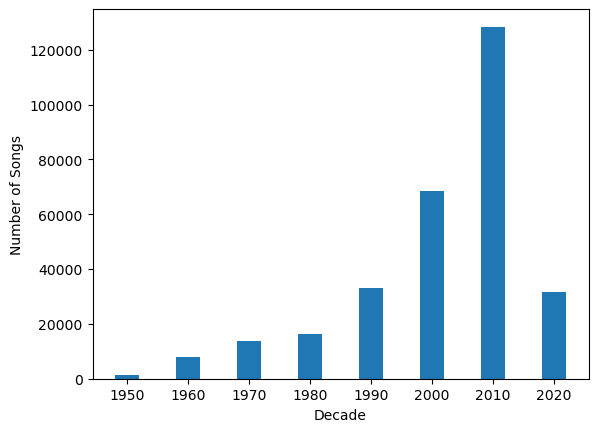

In [120]:
yrs=df['decade'].value_counts()
print(yrs)
plt.bar(yrs.index,yrs,width=4)
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.show()

### Number of songs per genre ###

main_genre
pop            72483
rock           57355
country        44837
alternative    42190
pop rock       33940
punk           14350
metal          10111
rap             8671
soul            6143
jazz            5287
reggae          3290
electronic      2057
Name: count, dtype: int64


Text(0, 0.5, 'Main Genre')

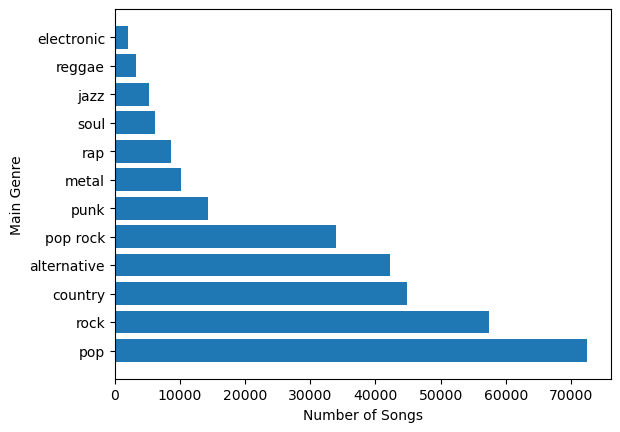

In [121]:
grs=df['main_genre'].value_counts()
print(grs)
plt.barh(grs.index,grs)
plt.xlabel('Number of Songs')
plt.ylabel('Main Genre')

### Number of songs per number of sections: ###

In [122]:
secs=df['num_sections'].value_counts()
print(secs)

num_sections
1      115415
7       36892
6       32075
8       30380
5       21019
9       19033
4       13251
10      10249
3        6390
11       5173
2        5130
12       2617
13       1324
14        698
15        362
16        294
17        118
18         80
20         51
19         43
21         29
22         25
23          9
26          9
24          8
29          5
71          3
28          2
25          2
30          2
27          2
32          2
76          1
74          1
40          1
105         1
93          1
83          1
96          1
78          1
66          1
59          1
85          1
31          1
33          1
43          1
73          1
106         1
69          1
94          1
39          1
54          1
37          1
36          1
Name: count, dtype: int64


There are some crazy outliers, some songs have 100+ sections. Plot only those $\leq$ 20 sections, which end up comprising more than 99% of the data.

num_sections
1     115415
7      36892
6      32075
8      30380
5      21019
9      19033
4      13251
10     10249
3       6390
11      5173
2       5130
12      2617
13      1324
14       698
15       362
16       294
17       118
18        80
20        51
19        43
Name: count, dtype: int64
300594


Text(0.5, 0, 'Number of Sections')

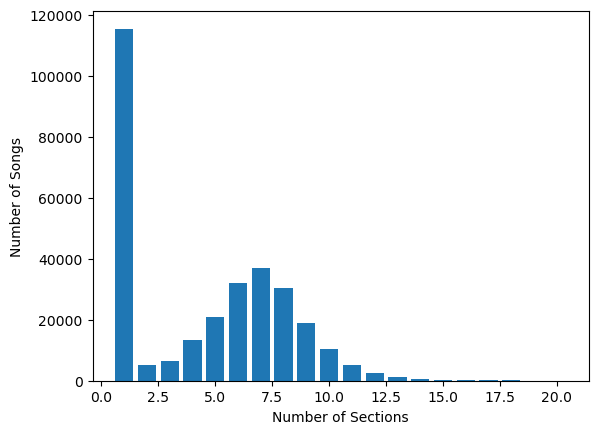

In [123]:
#bar plot
secs=df[df['num_sections']<=20].num_sections.value_counts()
print(secs)
print(secs.sum()) #accounts for over 99.9% of data
plt.bar(secs.index,secs)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Sections')

From this, it's apparent that a great deal of the time, those who contributed chords didn't bother to separate their songs into sections. Therefore, these section labels aren't reliable and no further analysis involving sections should be done.

### Songs per total unique chords: ###

In [124]:
uchords=df.tot_unique_chords.value_counts().sort_index()
print(uchords)

tot_unique_chords
2       4031
3      26541
4      57603
5      55088
6      45314
       ...  
94         1
95         1
98         1
107        1
125        1
Name: count, Length: 80, dtype: int64


Again, some huge outliers. Limit plot to songs with $\leq$ 30 unique chords, which account for over 99.5% of all data.

tot_unique_chords
4     57603
5     55088
6     45314
7     32062
3     26541
8     21831
9     15089
10    10774
11     7635
12     5599
13     4120
2      4031
14     3141
15     2303
16     1784
17     1454
18     1123
19      907
20      710
21      584
22      466
23      386
24      341
25      247
26      233
28      174
27      157
29      123
30      112
Name: count, dtype: int64
299932


Text(0.5, 0, 'Number of Unique Chords')

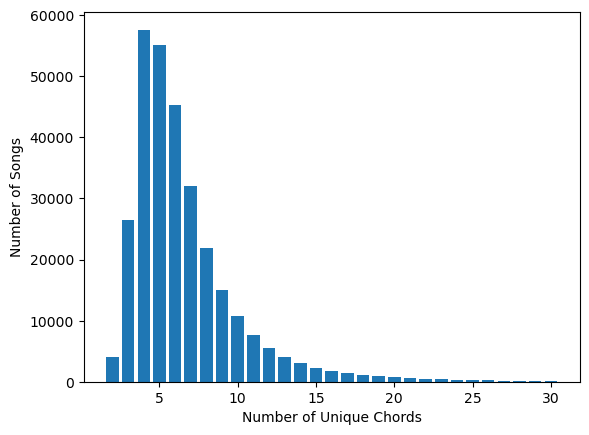

In [125]:

uchords=df[df['tot_unique_chords']<=30].tot_unique_chords.value_counts()
print(uchords)
print(uchords.sum()) #accounts for over 99.5% of data
plt.bar(uchords.index,uchords)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Unique Chords')

<Figure size 640x480 with 0 Axes>

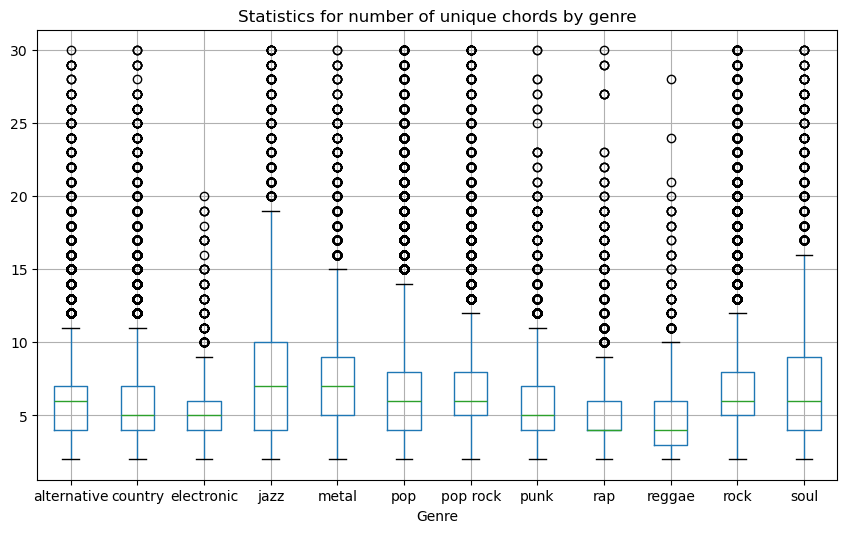

In [126]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of unique chords by genre')
plt.show()

In [127]:
#mean number of unique chords per genre
df[['tot_unique_chords','main_genre']].groupby('main_genre').mean()

,tot_unique_chords
main_genre,
alternative,6.195212
country,5.710217
electronic,5.347107
jazz,8.738793
metal,7.709326
pop,6.801526
pop rock,7.202357
punk,5.875122
rap,5.030331


Rap, reggae and electronic all have low medians/3rd quartiles and means. Metal, soul and jazz have the highest medians/3rd quartiels and means.

<Figure size 640x480 with 0 Axes>

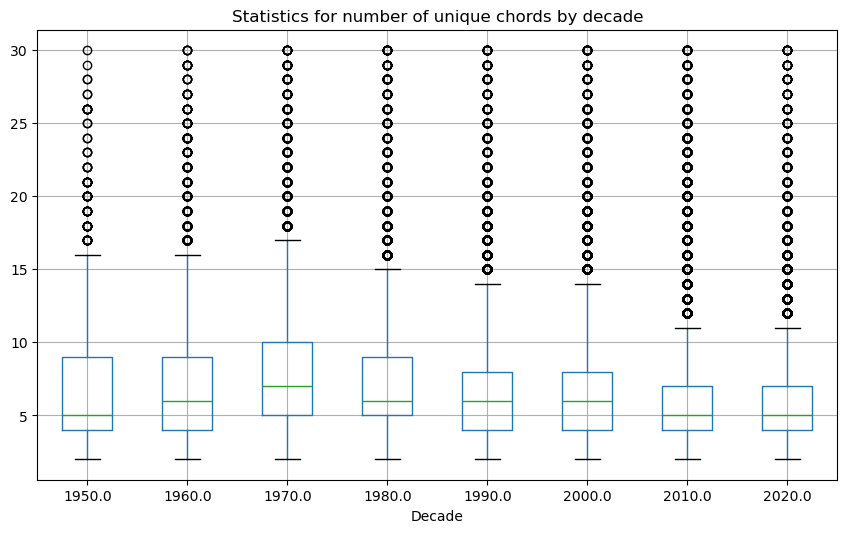

In [128]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of unique chords by decade')
plt.show()

In [129]:
#mean number of unique chords per decade
df[['tot_unique_chords','decade']].groupby('decade').mean()

,tot_unique_chords
decade,
1950.0,7.217156
1960.0,7.477726
1970.0,8.207187
1980.0,7.627575
1990.0,7.039004
2000.0,6.565080
2010.0,6.260916
2020.0,6.427033


The means and interquartile distributions for post-2000's music seem to be lower than the rest.

### Songs by total number of chords: ###

In [130]:
tchords=df.tot_chords.value_counts().sort_index()
print(tchords)


tot_chords
6       384
7       431
8       640
9       545
10      552
       ... 
1551      1
1601      1
1648      1
2011      1
2261      1
Name: count, Length: 485, dtype: int64


Once again, large outliers. Restrict plot to songs using $\leq$ 250 chords, which comprise more than 99.5% of total data. Since this feature is more continuous than the others, use histrogram instead of bar plot.

tot_chords
72     3826
64     3713
60     3694
56     3504
76     3493
       ... 
250      16
249      15
244      13
243      11
245      11
Name: count, Length: 245, dtype: int64
299854


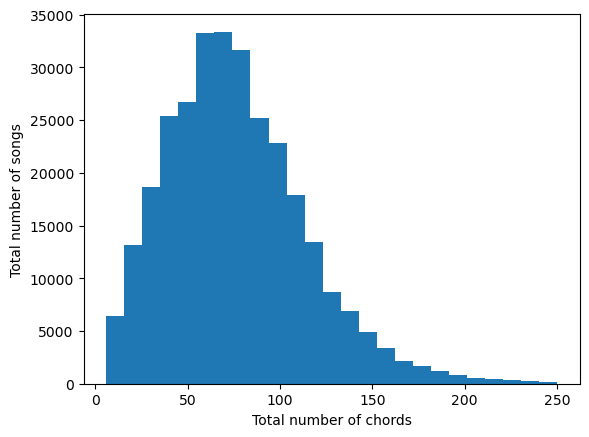

In [131]:
tchords=df[df['tot_chords']<=250].tot_chords.value_counts()
print(tchords)
print(tchords.sum()) #accounts for more than 99.5% data
#plt.bar(tchords.index,uchords)
plt.hist(df[df['tot_chords']<=250]['tot_chords'],bins=25)
plt.xlabel('Total number of chords')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

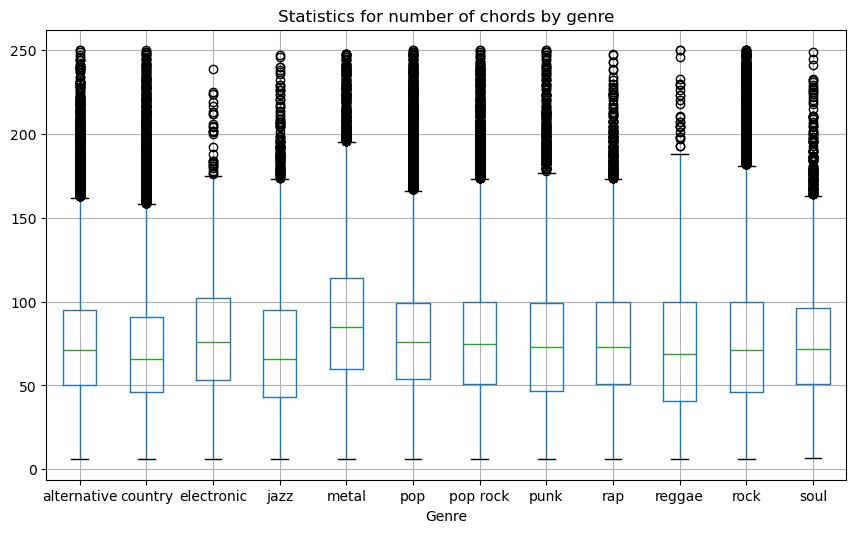

In [132]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of chords by genre')
plt.show()

In [133]:
#mean number of chords per genre
df[['tot_chords','main_genre']].groupby('main_genre').mean()

,tot_chords
main_genre,
alternative,74.705072
country,71.427861
electronic,80.206125
jazz,73.547948
metal,92.025022
pop,79.193190
pop rock,78.833353
punk,76.647456
rap,78.534194


Metal again jumps out as having the highest statistics.

<Figure size 640x480 with 0 Axes>

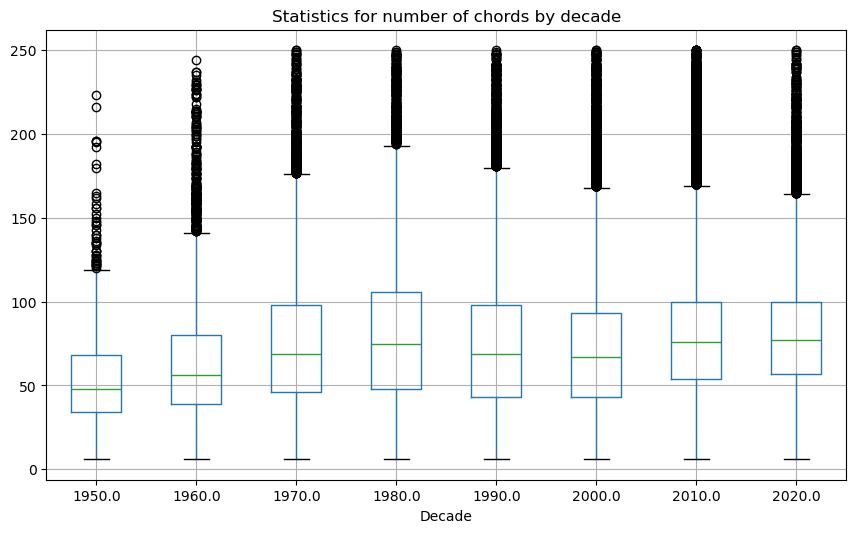

In [134]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of chords by decade')
plt.show()

In [135]:
#mean number of chords per decade
df[['tot_chords','decade']].groupby('decade').mean()

,tot_chords
decade,
1950.0,54.867852
1960.0,63.946694
1970.0,77.760581
1980.0,82.432825
1990.0,75.484964
2000.0,71.911597
2010.0,79.684171
2020.0,81.441801


The interquartile distributions and means of total number of chords seem to be steadily rising since the 1950's.

### Songs per unique chord density: ####

count    300714.000000
mean          0.107857
std           0.082294
min           0.005435
25%           0.058252
50%           0.084746
75%           0.128205
max           1.000000
Name: unique_chord_density, dtype: float64


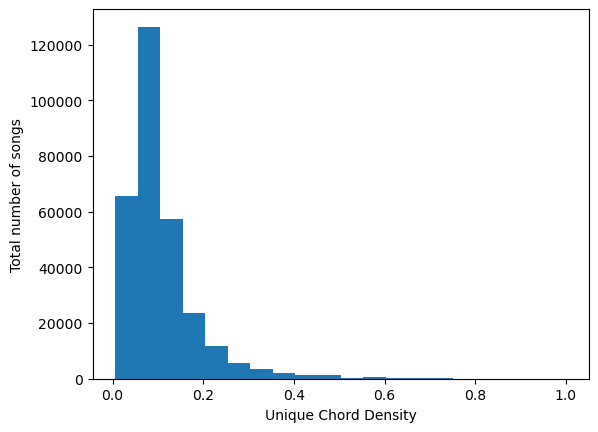

In [136]:
plt.hist(df.unique_chord_density,bins=20)
print(df.unique_chord_density.describe())
plt.xlabel('Unique Chord Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

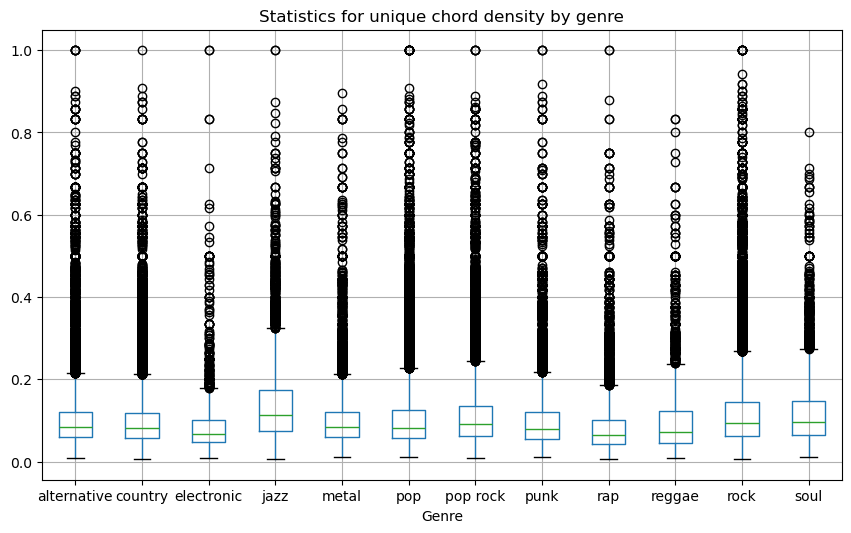

In [137]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_chord_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique chord density by genre')
plt.show()

In [138]:
#mean number of chords per decade
df[['unique_chord_density','main_genre']].groupby('main_genre').mean()

,unique_chord_density
main_genre,
alternative,0.102906
country,0.100524
electronic,0.089199
jazz,0.142700
metal,0.103138
pop,0.103817
pop rock,0.113954
punk,0.105105
rap,0.086930


Jazz is far ahead of the others in terms of mean and interquartile distribution

<Figure size 640x480 with 0 Axes>

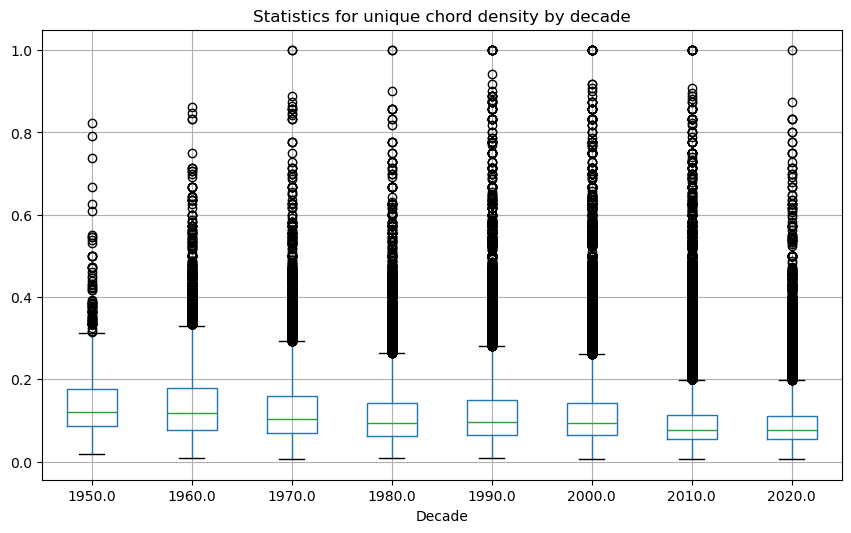

In [139]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_chord_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique chord density by decade')
plt.show()

In [140]:
#mean number of chords per decade
df[['unique_chord_density','decade']].groupby('decade').mean()

,unique_chord_density
decade,
1950.0,0.146014
1960.0,0.143657
1970.0,0.129893
1980.0,0.118027
1990.0,0.124406
2000.0,0.119879
2010.0,0.094726
2020.0,0.092457


The mean and interquartile distributions seem to generally be shifting lower over time since the 1940's.

### TL;DR: ### 
For unique 2,3,4 and 5-gram density analyses (and 2-gram density difference), the decade split results are all similar to unique chord density. The genre-split results are mostly similar too, with differences starting to emerge at n=4 or 5. So only one or two of these might be useful features.

##### Songs per unique 2-gram density: ####

count    300714.000000
mean          0.196191
std           0.131343
min           0.005435
25%           0.106509
50%           0.163715
75%           0.247423
max           0.969697
Name: unique_2gram_density, dtype: float64


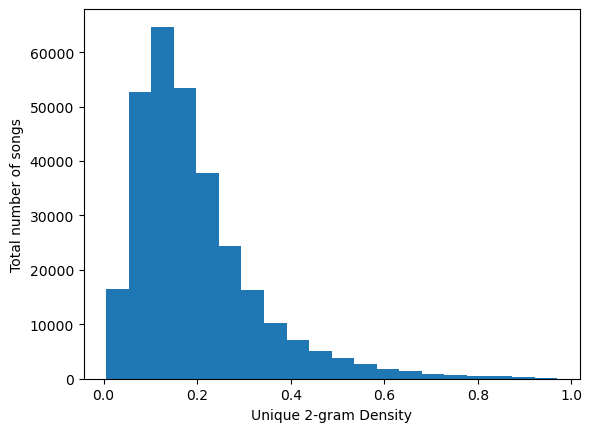

In [141]:
plt.hist(df.unique_2gram_density,bins=20)
print(df.unique_2gram_density.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

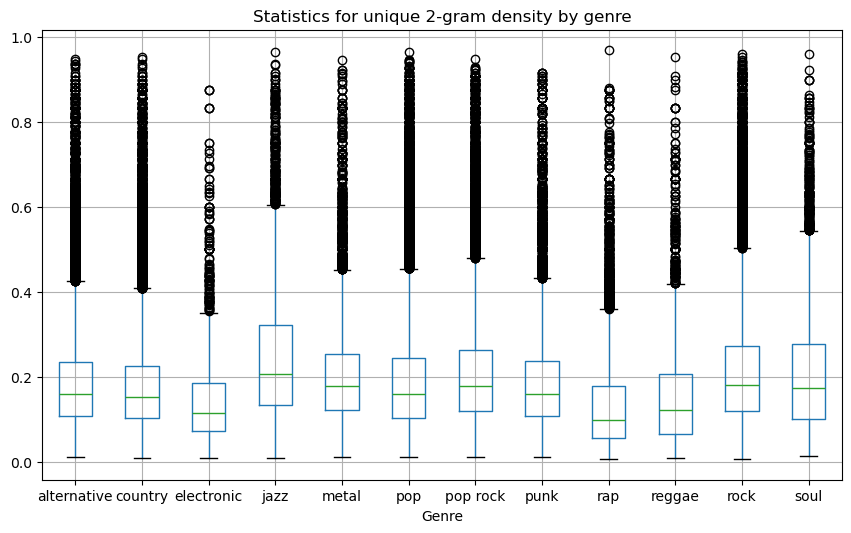

In [142]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by genre')
plt.show()

In [143]:
#mean unique 2-gram density per genre
df[['unique_2gram_density','main_genre']].groupby('main_genre').mean()

,unique_2gram_density
main_genre,
alternative,0.187612
country,0.182548
electronic,0.148047
jazz,0.248952
metal,0.205506
pop,0.191102
pop rock,0.211036
punk,0.193775
rap,0.137749


Again, jazz sticks typically has higher statistics, electronic and rap have lower statistics.

<Figure size 640x480 with 0 Axes>

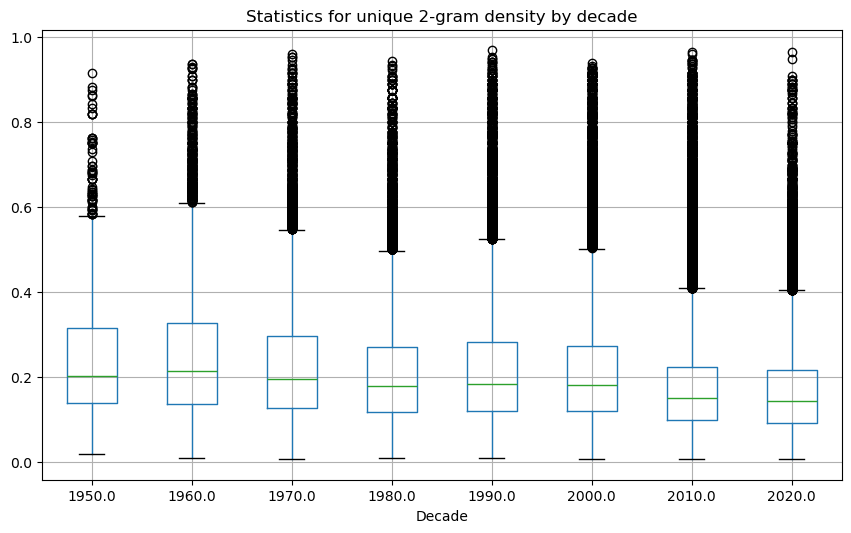

In [144]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by decade')
plt.show()

In [145]:
#mean unique 2-gram density per decade
df[['unique_2gram_density','decade']].groupby('decade').mean()

,unique_2gram_density
decade,
1950.0,0.248962
1960.0,0.251318
1970.0,0.230687
1980.0,0.213305
1990.0,0.221795
2000.0,0.216683
2010.0,0.175474
2020.0,0.169305


Still appears to be a bit of a downward trend over time.

##### Songs per unique 3-gram density: ####

count    300714.000000
mean          0.265656
std           0.162074
min           0.005435
25%           0.148148
50%           0.233766
75%           0.346154
max           0.978022
Name: unique_3gram_density, dtype: float64


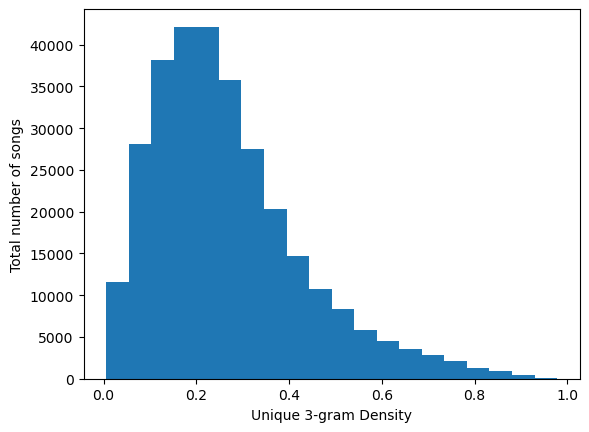

In [146]:
plt.hist(df.unique_3gram_density,bins=20)
print(df.unique_3gram_density.describe())
plt.xlabel('Unique 3-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

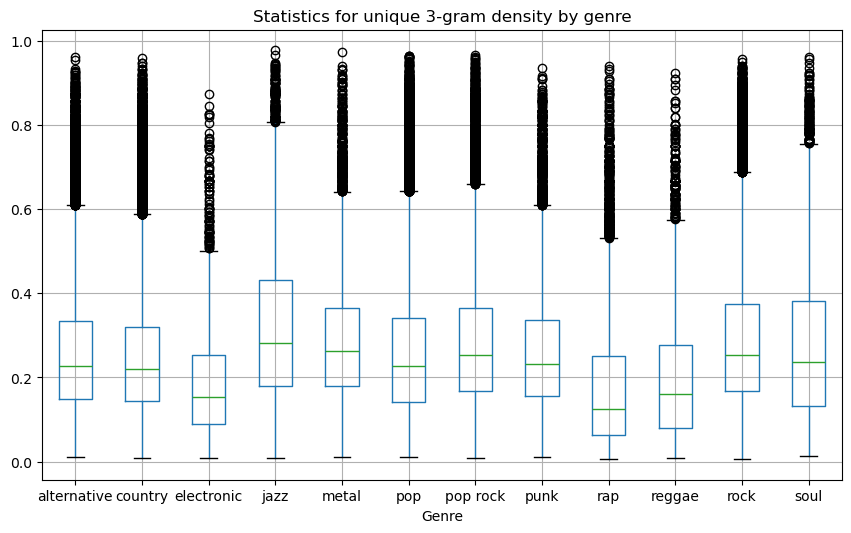

In [147]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_3gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by genre')
plt.show()

In [148]:
#mean unique 3-gram density per genre
df[['unique_3gram_density','main_genre']].groupby('main_genre').mean()

,unique_3gram_density
main_genre,
alternative,0.256405
country,0.251667
electronic,0.195792
jazz,0.324045
metal,0.287234
pop,0.259661
pop rock,0.284849
punk,0.264621
rap,0.178816


Again, jazz has highest statistics and electronic, rap and reggae have the lowest.

<Figure size 640x480 with 0 Axes>

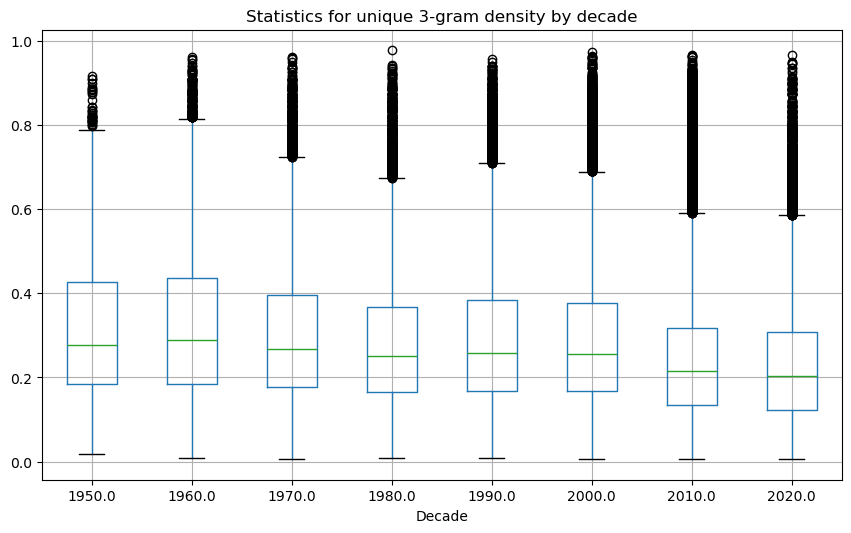

In [149]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_3gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by decade')
plt.show()

In [150]:
#mean unique 3-gram density per decade
df[['unique_3gram_density','decade']].groupby('decade').mean()

,unique_3gram_density
decade,
1950.0,0.323337
1960.0,0.327938
1970.0,0.304060
1980.0,0.285250
1990.0,0.294682
2000.0,0.290450
2010.0,0.242112
2020.0,0.232359


Same gradual downward trend.

##### Songs per unique 4-gram density: ####

count    300714.000000
mean          0.321222
std           0.181313
min           0.005435
25%           0.186275
50%           0.294872
75%           0.428571
max           0.974359
Name: unique_4gram_density, dtype: float64


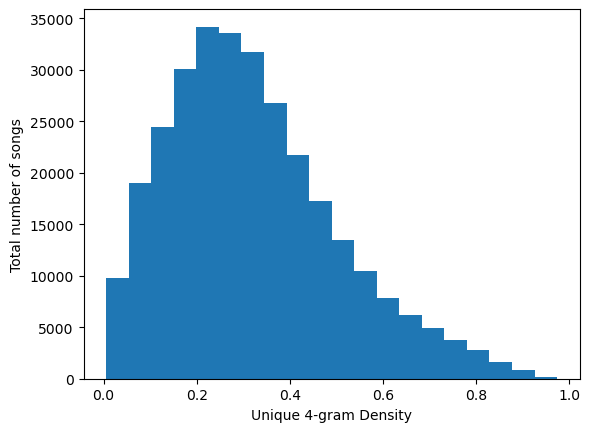

In [151]:
plt.hist(df.unique_4gram_density,bins=20)
print(df.unique_4gram_density.describe())
plt.xlabel('Unique 4-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

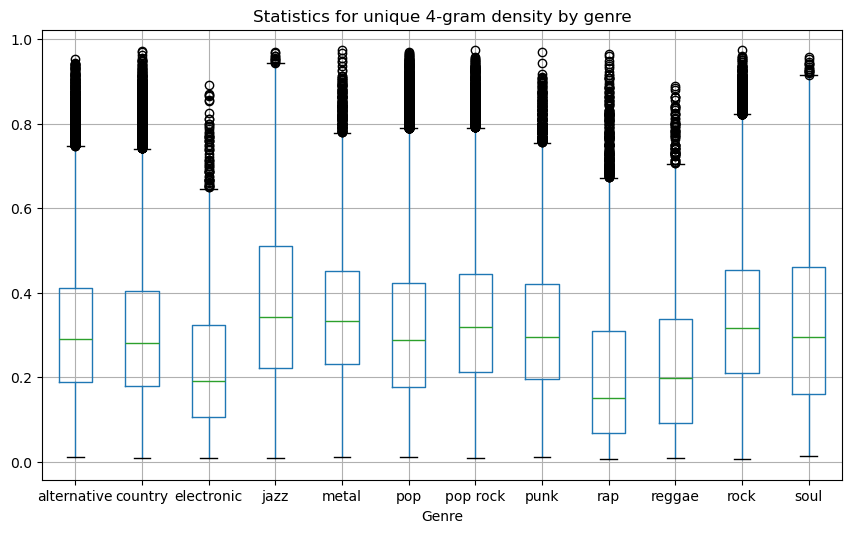

In [152]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_4gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by genre')
plt.show()

In [153]:
#mean unique 4-gram density per genre
df[['unique_4gram_density','main_genre']].groupby('main_genre').mean()

,unique_4gram_density
main_genre,
alternative,0.313258
country,0.308388
electronic,0.236285
jazz,0.378613
metal,0.351634
pop,0.314638
pop rock,0.342943
punk,0.322062
rap,0.212981


Metal starting to rival jazz at the top, with electronic, rap and reggae still the lowest.

<Figure size 640x480 with 0 Axes>

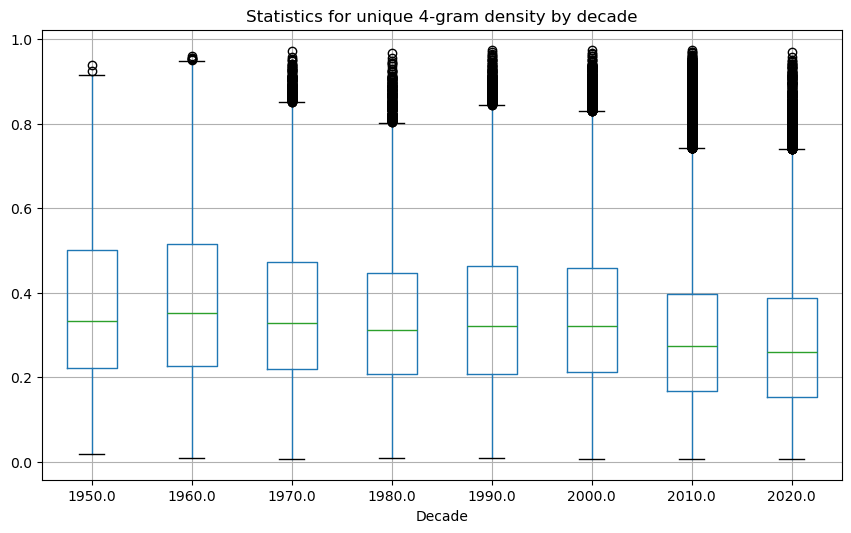

In [154]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_4gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by decade')
plt.show()

In [155]:
#mean unique 4-gram density per decade
df[['unique_4gram_density','decade']].groupby('decade').mean()

,unique_4gram_density
decade,
1950.0,0.376785
1960.0,0.383653
1970.0,0.359672
1980.0,0.341077
1990.0,0.350482
2000.0,0.347808
2010.0,0.297272
2020.0,0.285333


Same general trend.

##### Songs per unique 5-gram density: ####

count    300714.000000
mean          0.365694
std           0.193224
min           0.005435
25%           0.222222
50%           0.346535
75%           0.490196
max           0.975460
Name: unique_5gram_density, dtype: float64


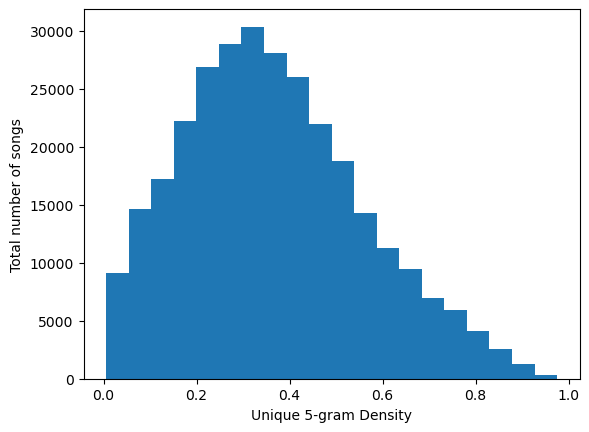

In [156]:
plt.hist(df.unique_5gram_density,bins=20)
print(df.unique_5gram_density.describe())
plt.xlabel('Unique 5-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

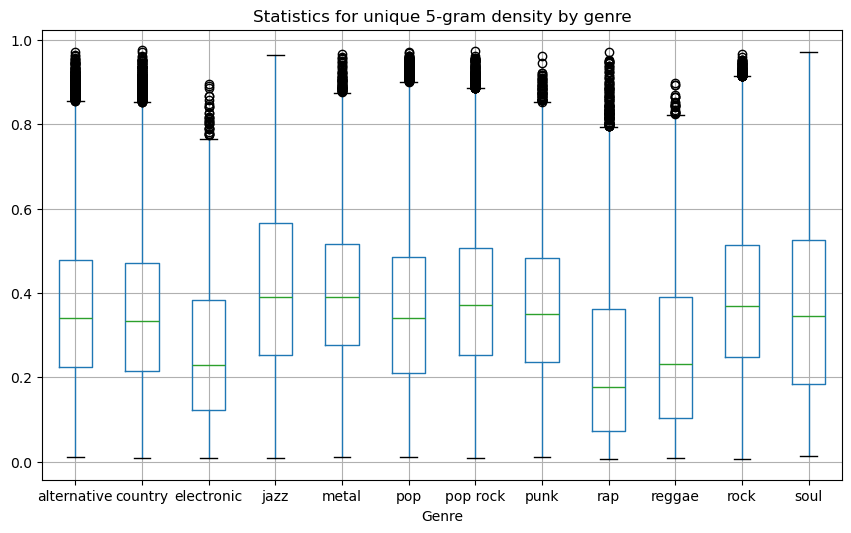

In [157]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_5gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by genre')
plt.show()

In [158]:
#mean unique 5-gram density per genre
df[['unique_5gram_density','main_genre']].groupby('main_genre').mean()

,unique_5gram_density
main_genre,
alternative,0.359837
country,0.353983
electronic,0.270538
jazz,0.419074
metal,0.402797
pop,0.358969
pop rock,0.389058
punk,0.367883
rap,0.241050


Rap, reggae and electronic still clearly the lowest.

<Figure size 640x480 with 0 Axes>

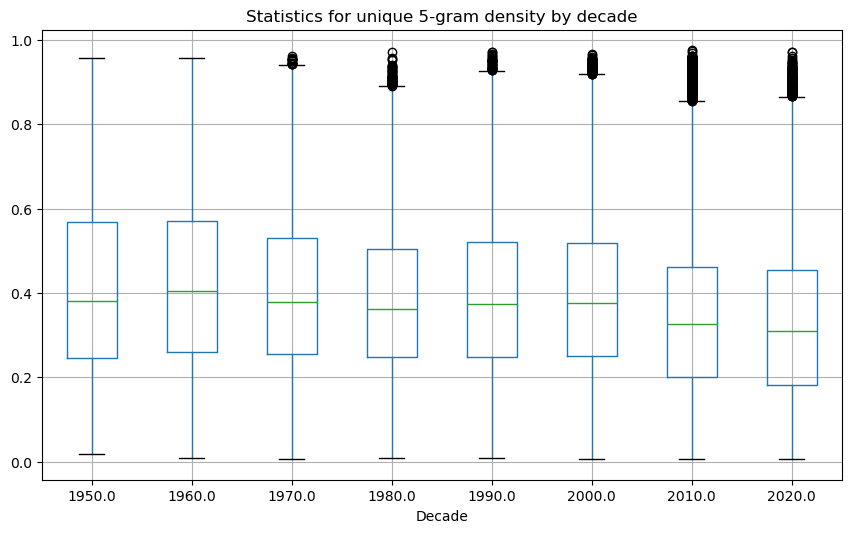

In [159]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_5gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by decade')
plt.show()

In [160]:
#mean unique 5-gram density per decade
df[['unique_5gram_density','decade']].groupby('decade').mean()

,unique_5gram_density
decade,
1950.0,0.416264
1960.0,0.424607
1970.0,0.402281
1980.0,0.385075
1990.0,0.393257
2000.0,0.392450
2010.0,0.342661
2020.0,0.329618


Same tend.

#### Songs by unique 2-gram difference ####

count    300714.000000
mean          0.088334
std           0.066706
min          -0.166667
25%           0.041667
50%           0.075000
75%           0.120000
max           0.600000
Name: unique_2gram_difference, dtype: float64


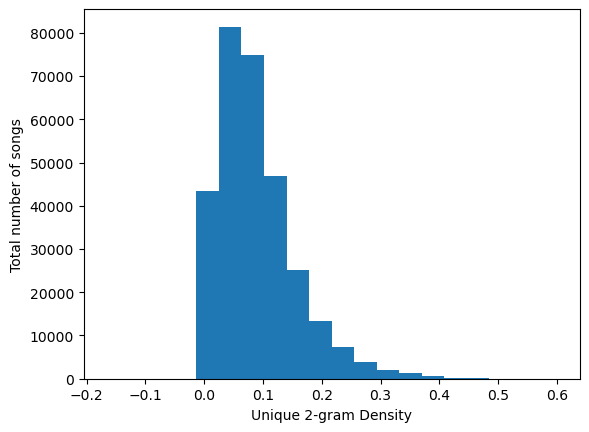

In [161]:
plt.hist(df.unique_2gram_difference,bins=20)
print(df.unique_2gram_difference.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

Songs with density -.2 represent those exactly 5 chords long; might remove these from data later.

<Figure size 640x480 with 0 Axes>

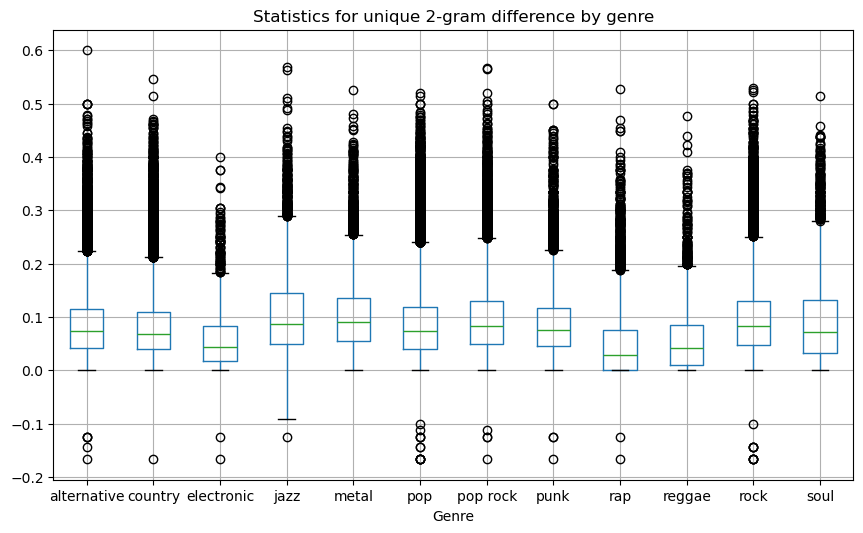

In [162]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_difference',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by genre')
plt.show()

In [163]:
#mean unique 2-gram  difference density per genre
df[['unique_2gram_difference','main_genre']].groupby('main_genre').mean()

,unique_2gram_difference
main_genre,
alternative,0.084706
country,0.082024
electronic,0.058848
jazz,0.106252
metal,0.102368
pop,0.087285
pop rock,0.097082
punk,0.088670
rap,0.050818


Rap, reggae and electronic clearly the lowest statistics.

<Figure size 640x480 with 0 Axes>

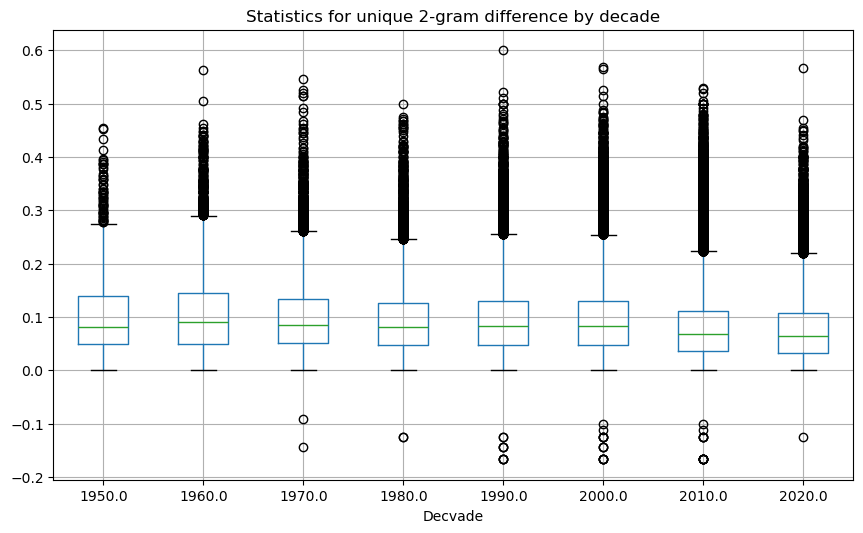

In [164]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_difference',by='decade',figsize=(10,6))
plt.xlabel('Decvade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by decade')
plt.show()

In [165]:
#mean unique 2-gram  difference density per decade
df[['unique_2gram_difference','decade']].groupby('decade').mean()

,unique_2gram_difference
decade,
1950.0,0.102947
1960.0,0.107660
1970.0,0.100793
1980.0,0.095278
1990.0,0.097390
2000.0,0.096805
2010.0,0.080748
2020.0,0.076848


Again, a seemingly downward trend over time.

### Pairplots ###

In [166]:
import seaborn as sns

In [167]:
df.columns

Index(['Unnamed: 0', 'chords', 'chord_dict', 'num_sections', 'tot_chords',
       'tot_unique_chords', 'unique_chord_density', 'unique_2gram_density',
       'unique_3gram_density', 'unique_4gram_density', 'unique_5gram_density',
       'unique_2gram_difference', 'release_date', 'decade', 'main_genre',
       'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

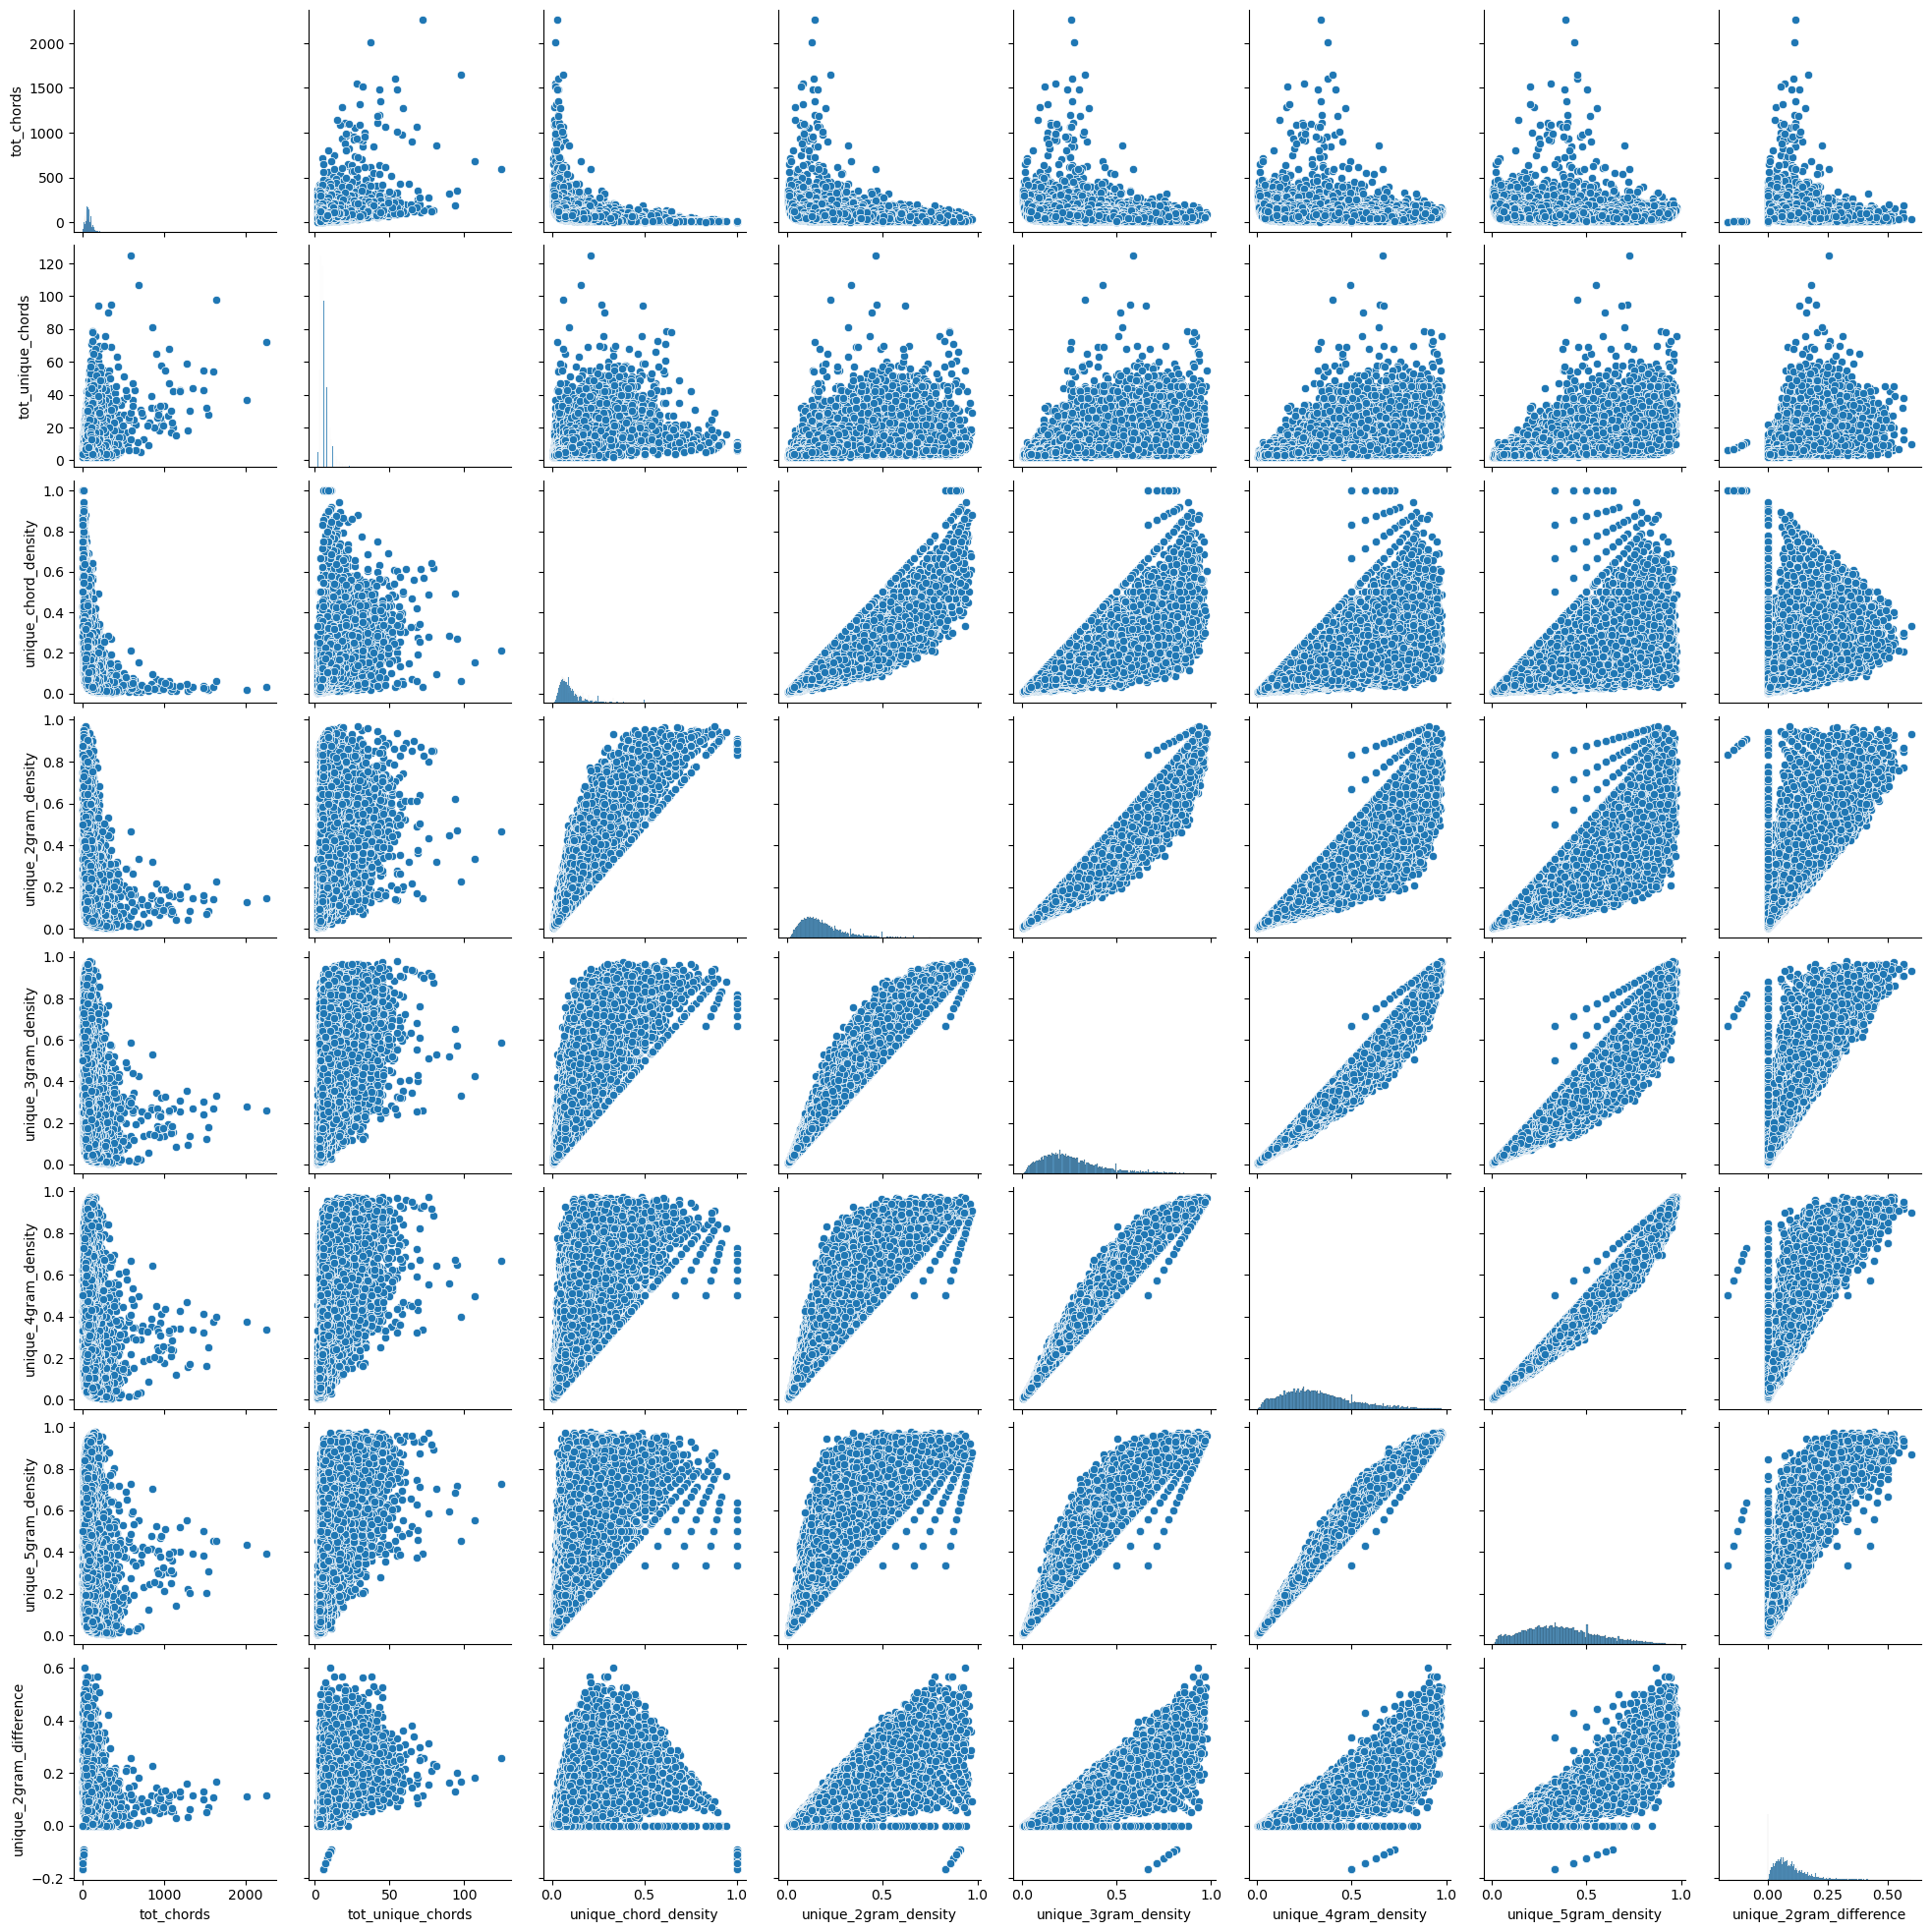

In [168]:
sns.pairplot(data = df,
                x_vars = ['tot_chords','tot_unique_chords','unique_chord_density',
                          'unique_2gram_density','unique_3gram_density','unique_4gram_density',
                          'unique_5gram_density','unique_2gram_difference'],
                y_vars = ['tot_chords','tot_unique_chords','unique_chord_density',
                          'unique_2gram_density','unique_3gram_density','unique_4gram_density',
                          'unique_5gram_density','unique_2gram_difference'])
plt.show()

In [169]:
df[df['tot_chords']<10]

,Unnamed: 0,chords,chord_dict,num_sections,tot_chords,tot_unique_chords,unique_chord_density,unique_2gram_density,unique_3gram_density,unique_4gram_density,unique_5gram_density,unique_2gram_difference,release_date,decade,main_genre,spotify_song_id,spotify_artist_id
1422,1422,<chorus_1> D Emin G A D Emin G A,{'chorus_1': 'D Emin G A D Emin G A'},1,8,4,0.500000,0.500000,0.500000,0.500000,0.500000,0.000,2023-06-09,2020.0,pop,5FQ77Cl1ndljtwwImdtjMy,1Hsdzj7Dlq2I7tHP7501T4
2316,2316,<chorus_1> G C D G C D G,{'chorus_1': 'G C D G C D G'},1,7,3,0.428571,0.428571,0.428571,0.428571,0.428571,0.000,2009-12-08,2000.0,pop rock,0srA6fd3vYdsHlQZ9aGMkm,0N1TIXCk9Q9JbEPXQDclEL
2840,2840,<verse_1> Amaj7 A Amaj7 A Bmin7 A Bmin7 A,{'verse_1': 'Amaj7 A Amaj7 A Bmin7 A Bmin7 A'},1,8,3,0.375000,0.500000,0.625000,0.625000,0.500000,0.125,2023-09-22,2020.0,rap,4JOjqoaUEMZ0SOAzaKUwDj,5nvWOyAkfNgVLKESq4fOj2
3212,3212,<intro_1> Dsus4 D Dsus4 D Dsus4 D Dsus4 D,{'intro_1': 'Dsus4 D Dsus4 D Dsus4 D Dsus4 D'},1,8,2,0.250000,0.250000,0.250000,0.250000,0.250000,0.000,1973-01-01,1970.0,rock,6Ue68LZS3qr9EQPFllfaqr,0IzJYdxaNLwrC7diSCu0iY
3420,3420,<outro_1> B B7 B E Emin B G7 Cmin,{'outro_1': 'B B7 B E Emin B G7 Cmin'},1,8,6,0.750000,0.875000,0.750000,0.625000,0.500000,0.125,2023-03-23,2020.0,rap,0Vx3kohY3Ukfh56klqzlak,4e250LmaRPGcp0rbUbJtJm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298943,298943,<outro_1> D G D G D G D G,{'outro_1': 'D G D G D G D G'},1,8,2,0.250000,0.250000,0.250000,0.250000,0.250000,0.000,2021-04-30,2020.0,alternative,5otNlLZsHLEDk20ZXTb2bc,3JSSjGYcIkgsrz7892CelT
299506,299506,<verse_1> A <chorus_1> Gs A <chorus_2> Gs A <c...,"{'verse_1': 'A', 'chorus_1': 'Gs A', 'chorus_2...",4,7,2,0.285714,0.285714,0.285714,0.285714,0.285714,0.000,2020-02-14,2010.0,country,1ebcUywU39akcO5oVzAiMU,4PmC63uE7ZLY5TI3p0PGd3
299897,299897,<bridge_1> Amin D Emin C Amin D Emin C,{'bridge_1': 'Amin D Emin C Amin D Emin C'},1,8,4,0.500000,0.500000,0.500000,0.500000,0.500000,0.000,2022-04-07,2020.0,rap,7hbcRsR3AfOtNfjRrZAChl,0jdNdfi4vAuVi7a6cPDFBM
300376,300376,<intro_1> A D/Fs A D/Fs A D/Fs,{'intro_1': 'A D/Fs A D/Fs A D/Fs'},1,6,2,0.333333,0.333333,0.333333,0.333333,0.333333,0.000,2020-12-10,2010.0,pop,5XJIXRAM4ivaOitRM4NuE4,7eLcDZDYHXZCebtQmVFL25
